In [ ]:
using LinearAlgebra, Plots

In [ ]:
using LinearAlgebra, Plots
function FE(f, a, b, u0, N) 
    ndf = length(u0)
    u = zeros(N+1)
    dt = (b-a)/N
    t = Vector(range(a, b, length=N+1))
    u[1] = u0
    for i in 1:N
        u[i+1] = u[i] .+ dt * f(t[i], u[i])
    end
    return t, u
end

In [ ]:
# Store Fine Solution
a=0
b=10
u0=1
f(t, u)= -u+sin(10*t)
texact, uexact=FE(f, a, b, u0, 1800)

In [ ]:
function parareal(a, b, u0, N, F, G, K)
    tval=Vector(range(a, b, N+1))
    Ufine=zeros(N+1)
    Ufine[1] = u0
    for i in 1:N
        Ufine[i+1] = F(tval[i], tval[i+1], Ufine[i])
    end
    Uk=[Vector{Float64}(undef, N+1) for k in 1:K+1]
    for k in 1:K+1
        Uk[k][1]=u0
    end
    for j in 1:N
        #Uk[1][j+1]=G(tval[j], tval[j+1], Uk[1][j])
        Uk[1][j+1]=10.0 # may take random initial guess
    end
    for k in 1:K
        for i in 1:N
            
            Fk0=F(tval[i], tval[i+1], Uk[k][i])
            Gk0=G(tval[i], tval[i+1], Uk[k][i])
            Gk1=G(tval[i], tval[i+1], Uk[k+1][i])
            
            Uk[k+1][i+1]=Fk0 + Gk1 - Gk0
        end
    end
    
    return Uk, Ufine, tval
end

In [ ]:
function Fs(a, b, u0)
    t, u=FE(f, a, b, u0, 10)
    return u[end]
end

In [ ]:
function Gs(a, b, u0)
    t, u=FE(f,  a, b, u0, 1)
    return u[end]
end

In [ ]:
a=0
b=10
u0=1

K=15 # Number of iteration

N = 10^8
texact, uexact=FE(f, a, b, u0, 1800)
err=zeros(K+1)
# Parareal Solution

    #Uk, Ufine, tval=parareal(a, b, u0, N, Fs, Gs, K)

    # stroing errors
    
    for k in 1:K+1
        Uk, Ufine, tval=parareal(a, b, u0, N, Fs, Gs, k)
        err[k]=norm(Uk[k] - Ufine)
    end



using Plots
plot(err, yaxis=:log, xlabel="Number of iterations", ylabel="error", label="N=3^3", title="Double precision parareal")


In [ ]:
err

# Parareal for System of ODEs

In [ ]:
using LinearAlgebra, Plots

In [ ]:
function lorenz(u, t)
    sigma = 10
    rho = 28
    beta = 8/3
    y1 = sigma*(u[2] - u[1])
    y2 = rho*u[1] - u[2] - u[1]*u[3]
    y3 = u[1]*u[2] - beta*u[3]
    return [y1; y2; y3]
end

In [ ]:
function rk4(f, tspan, u0, N)
    # Define time step
    dt = (tspan[2] - tspan[1]) / N
    
    # Initialize arrays for storing solution
    t = collect(tspan[1]:dt:tspan[2])
    u = zeros(length(u0), length(t))
    u[:, 1] = u0
    
    # Use fourth-order Runge-Kutta method to solve ODE system
    for i in 1:length(t)-1
        k1 = f(u[:, i], t[i])
        k2 = f(u[:, i] + dt/2 * k1, t[i] + dt/2)
        k3 = f(u[:, i] + dt/2 * k2, t[i] + dt/2)
        k4 = f(u[:, i] + dt * k3, t[i] + dt)
        u[:, i+1] = u[:, i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    end
    
    return t, u
end

In [ ]:
t1 = 0
t2 = 10
u0 = [20; 5; -5]
N = 1800
t, utrue = rk4(lorenz, [t1, t2], u0, N)

In [ ]:
function sysparareal(t1, t2, u0, N, F, G, K) 
    # a= start time value (t0)
    # b= End time value (tend)
    # N= Number of Subinterval
    # u0=initial Solution
    # F= Fine Solver
    # G= Coarse Solver
    # K= Parareal iteration
    ndf=length(u0)
    tspan = (t1, t2)
    dt=(t2-t1)/N
    tval=collect(tspan[1]:dt:tspan[2])
    #ufine::Array{Float64}=zeros(ndf, N+1, K+1)
    #ufine[:, 1] = u0
    #for n in 1:N
       # ufine[:,n+1] = F(tval[n], tval[n+1], ufine[:,n])
    #end
    U::Array{Float64}=zeros(ndf, N+1, K+1)
    #Storing the initial solution
        U[:,1, 1] = u0
    # Parareal Initialization
    for n in 1:N
        #U[:,n+1, 1] = G(tval[n], tval[n+1], U[:,n, 1]) # May take random initial guess
        U[:,n+1, 1] .= 10.0
    end
    
    # Parareal loop
    for k in 1:K
        U[:,1,k+1] = u0
        for n in 1:N
            #δUk[k][:, i]=Uk[k+1][:,i] - Uk[k][:,i]
            Fk = F(tval[n], tval[n+1], U[:, n, k])
            Gk0 = G(tval[n], tval[n+1], U[:, n, k])
            Gk1 = G(tval[n], tval[n+1], U[:, n, k+1])
            U[:, n+1, k+1] = Fk + Gk1 - Gk0
        end
    end
    
    return tval, U
  
end

In [ ]:
function Fs1(t1, t2, u0)
    t, u = rk4(lorenz, [t1, t2], u0, 10)
    return u[:, end]
end

In [ ]:
function Gs1(t1, t2, u0)
    t, u = rk4(lorenz, [t1, t2], u0, 1)
    return u[:, end]
end

In [ ]:
t1=0
t2=10
u0 = [20; 5; -5]

N=[450 300 225 180]
p =4


KK = 20; # number of parareal iterations to plot
err_double = zeros(p, KK+1);
for i in 1:p
    for K = 0:KK
        t, u = sysparareal(t1, t2, u0, N[i], Fs1, Gs1, K)
        err_double[i, K+1] = norm(u[:, 2:end, K+1]- utrue[:, (2*i+3):(2*i+2):end]) 
    end
end

using Plots
plot(err_double[1,:], yaxis=:log, xlabel="Number of iterations", ylabel="error", label="N=450", title="Double precision parareal")
plot!(err_double[2,:], yaxis=:log, xlabel="Number of iterations", ylabel="error", label="N=300")
plot!(err_double[3,:], yaxis=:log, xlabel="Number of iterations", ylabel="error", label="N=225")
plot!(err_double[4,:], yaxis=:log, xlabel="Number of iterations", ylabel="error", label="N=180")

display(plot!(legend=:topright))

In [1]:
function srk4(f, tspan, u0, N)
    # Define time step
    dt = (tspan[2] - tspan[1]) / N
    # Initialize arrays for storing solution
    t = collect(tspan[1]:dt:tspan[2])
    u = zeros(length(t))
    u[1] = u0
    
    # Use fourth-order Runge-Kutta method to solve ODE system
    for i in 1:length(t)-1
        k1 = f(u[i], t[i])
        k2 = f(u[i] + dt/2 * k1, t[i] + dt/2)
        k3 = f(u[i] + dt/2 * k2, t[i] + dt/2)
        k4 = f(u[i] + dt * k3, t[i] + dt)
        u[i+1] = u[i] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    end
    
    return t, u
end

srk4 (generic function with 1 method)

In [7]:
f(u, t)=-u+sin(10*t)
tspan=[0 10]
N=1800
u0=1
tx, ux=srk4(f, tspan, u0, N)

([0.0, 0.005555555555555556, 0.011111111111111112, 0.016666666666666666, 0.022222222222222223, 0.027777777777777776, 0.03333333333333333, 0.03888888888888889, 0.044444444444444446, 0.05  …  9.95, 9.955555555555556, 9.96111111111111, 9.966666666666667, 9.972222222222221, 9.977777777777778, 9.983333333333333, 9.988888888888889, 9.994444444444444, 10.0], [1.0, 0.9946138439595851, 0.9895647599362664, 0.9848494573231931, 0.9804637201326466, 0.9764024194258136, 0.9726595285627939, 0.9692281412257684, 0.9661004921596983, 0.9632679805665386  …  -0.05933080630166169, -0.0636728210119737, -0.06781820264605695, -0.07175416100718064, -0.0754685520955208, -0.07894991558002983, -0.08218751016075919, -0.08517134671252137, -0.08789221910762138, -0.09034173262255092])

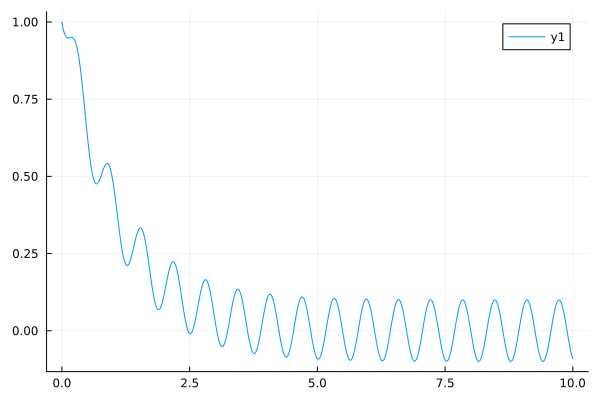

In [8]:
using Plots
plot(tx, ux)

In [11]:
using DifferentialEquations, Plots

# Define the ODE
function simple_ode(du, u, p, t)
    du[1] = -u[1] + sin(t)
end

# Define the coarse solver (Euler method)
function coarse_solver(ode, u0, tspan)
    prob = ODEProblem(ode, u0, tspan)
    sol = solve(prob, Euler())
    return sol
end

# Define the fine solver (RK4 method)
function fine_solver(ode, u0, tspan)
    prob = ODEProblem(ode, u0, tspan)
    sol = solve(prob, RK4())
    return sol
end

# Define the Parareal algorithm
function parareal_solver(ode, u0, tspan, nsubintervals, coarse_solver, fine_solver, maxiter)
    # Define subintervals
    dt = (tspan[2] - tspan[1]) / nsubintervals
    subintervals = [(i-1)*dt:i*dt for i in 1:nsubintervals]

    # Initialize solution with coarse solver
    u = Vector{Float64}[coarse_solver(ode, u0, subintervals[1])]
    for i in 2:nsubintervals
        # Fine solver at the end of the subinterval
        y_fine = fine_solver(ode, u[end], subintervals[i])[end]

        # Parareal correction
        y_coarse = coarse_solver(ode, u[end], subintervals[i])[end]
        error = y_fine - y_coarse
        alpha = 0.5
        y_corr = y_coarse + alpha * error

        # Add corrected solution to solution vector
        push!(u, y_corr)

        # Check convergence
        if i == nsubintervals
            if norm(error) > 1e-6 && maxiter > 1
                # If not converged, iterate again with corrected solution
                return parareal_solver(ode, u[1], tspan, nsubintervals, coarse_solver, fine_solver, maxiter-1)
            end
        end
    end
    return u
end

# Set up problem
u0 = [0.0]
tspan = (0.0, 10.0)

# Solve with Parareal algorithm
u_parareal = parareal_solver(simple_ode, u0, tspan, 10, coarse_solver, fine_solver, 5)

# Solve with fine solver
u_fine = fine_solver(simple_ode, u0, tspan)

# Compute errors
errors = [abs(u_parareal[i][end] - u_fine(tspan[1] + i*(tspan[2]-tspan[1])/10)[end]) for i in 1:10]

# Plot errors
plot(errors, xlabel="Subinterval", ylabel="Error", legend=false)

LoadError: Fixed timestep methods require a choice of dt or choosing the tstops